<a href="https://colab.research.google.com/github/ashadnadeem/BinaryClassification/blob/main/Hw4_Ashad_18660.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive/
Note: using Google CoLab


In [ ]:
!ls /content/drive/'My Drive'/'Colab Notebooks'/Faces/Ashad

10.png	12.png	14.png	16.png	18.png	1.png	2.png  4.png  6.png  8.png
11.png	13.png	15.png	17.png	19.png	20.png	3.png  5.png  7.png  9.png


In [ ]:
#Some More Test Cases which i tried
# Directory = "/content/drive/My Drive/Colab Notebooks/XandO"
# Category = ["O", "X"]

# Directory = "/content/drive/My Drive/Colab Notebooks/Faces"
# Category = ["TomHolland", "RobertJr"]

# Directory = "/content/drive/My Drive/Colab Notebooks/HulkandIron"
# Category = ["Hulk", "IronMan"]

Binary Classification between two faces of my family. Me and my sister!

**My face is being represented by a ‘0’** **value**

**My Sister’s face is being represented by a ‘1’ value**

In [ ]:
Directory = "/content/drive/My Drive/Colab Notebooks/Faces"
Category = ["Ashad", "Alina"]

In [ ]:
train_data = []
def create_training_data():
  for dNum, categ in enumerate(Category):
    path = os.path.join(Directory, categ)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        re_img_array = cv2.resize(img_array, (ForceImageSize, ForceImageSize))
        # plt.imshow(re_img_array, cmap = "gray")
        # plt.show()
        # print(dNum)
        # break
        train_data.append([re_img_array, dNum])
      except Exception as exp:
        pass
ForceImageSize = 100
create_training_data()
#Shuffling training Data for more accurate results
random.shuffle(train_data)

In [ ]:
print("Images Trained: ", len(train_data))

Images Trained:  40


Just to see a preveiw of 1st image after size has been decreased and picture have been covnverted to grayscale.

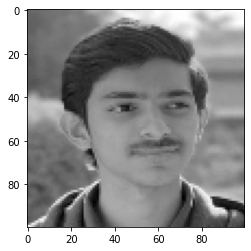

In [ ]:
##Debug Code To show First Image from Randomly Shuffled Train Data
plt.imshow(train_data[0][0], cmap = "gray")
plt.show()

Splitting the Train_data into Images and Their Label and putting them into lists;

In [ ]:
x = []
y = []
for features, label, in train_data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1, ForceImageSize, ForceImageSize, 1)

#Normalising the image
X = np.array(x/255.0)
Y = np.array(y)

Tensor Flow CNN

d.	Use the sample TensorFlow code provided to create a CNN-based Deep Neural Network without any changes in this part

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.

model = Sequential()

model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(14,(3,3)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test),verbose=0)

X.shape= (40, 100, 100, 1)
x_train.shape= (32, 100, 100, 1)
y_train.shape= (32,)
x_test.shape= (8, 100, 100, 1)
y_test.shape= (8,)


**Part e)   Refferences:**

1. https://www.tensorflow.org/tutorials/keras/classification

2. https://www.tensorflow.org/tutorials/images/classification

3. https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2


Part f) **Results should include:**

Results: standard loss, accuracy, validation_loss, validation_accuracy

***for this we will use verbose=2***


Part E making your TensorFlow/Keras Algorithm

**CNN Architecture Algorithm 1**

Part h) Determine The epochs for your model:


***epochs=30*** is enough for the convergence with enough validation accuracy aswell as standard accuracy to binary classify the images

In [ ]:
#Part E making your TensorFlow/Keras Algorithm
#CNN Architecture Algorithm 1

Trained_Image = np.array(x_train/255.0)
Trained_Labels = np.array(y_train)

model = Sequential()
model.add(Conv2D(25, (4,4), activation='relu', input_shape = X.shape[1:]))
model.add(Conv2D(50, (4,4), activation='relu'))
model.add(Conv2D(50, (4,4), activation='relu'))
# model.add(Conv2D(50, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])

# model.fit(Trained_Image, Trained_Labels, epochs=40, verbose=2, callbacks=[callback], validation_data=(x_test,y_test))
model.fit(Trained_Image, Trained_Labels, epochs=30, verbose=2, validation_data=(x_test,y_test))

Epoch 1/30
1/1 - 4s - loss: 0.6932 - accuracy: 0.4062 - val_loss: 1.4060 - val_accuracy: 0.5000
Epoch 2/30
1/1 - 3s - loss: 0.6924 - accuracy: 0.5000 - val_loss: 1.1870 - val_accuracy: 0.5000
Epoch 3/30
1/1 - 3s - loss: 0.6891 - accuracy: 0.5000 - val_loss: 2.6927 - val_accuracy: 0.5000
Epoch 4/30
1/1 - 3s - loss: 0.6774 - accuracy: 0.5625 - val_loss: 2.8045 - val_accuracy: 0.5000
Epoch 5/30
1/1 - 3s - loss: 0.6728 - accuracy: 0.5312 - val_loss: 0.4195 - val_accuracy: 0.8750
Epoch 6/30
1/1 - 3s - loss: 0.6461 - accuracy: 0.5625 - val_loss: 2.2090 - val_accuracy: 0.7500
Epoch 7/30
1/1 - 3s - loss: 0.5945 - accuracy: 0.9062 - val_loss: 10.8407 - val_accuracy: 0.5000
Epoch 8/30
1/1 - 3s - loss: 0.6229 - accuracy: 0.5938 - val_loss: 6.9105 - val_accuracy: 0.5000
Epoch 9/30
1/1 - 3s - loss: 0.5411 - accuracy: 0.9062 - val_loss: 7.4350 - val_accuracy: 0.7500
Epoch 10/30
1/1 - 3s - loss: 0.4917 - accuracy: 0.9062 - val_loss: 15.3386 - val_accuracy: 0.5000
Epoch 11/30
1/1 - 3s - loss: 0.4325 -

Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


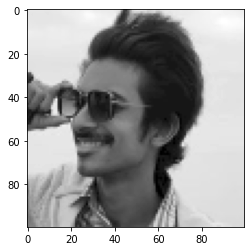


Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


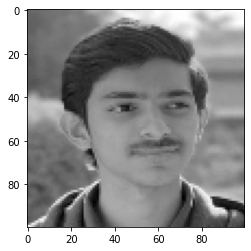


Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


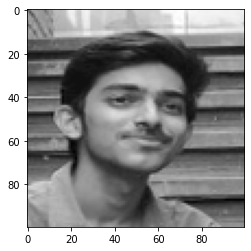


Predicted Percentage :  0.0 %
Predicted Value :  Ashad
True Value : Alina
Mis-Classified


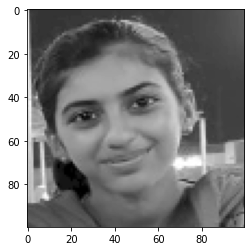


Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


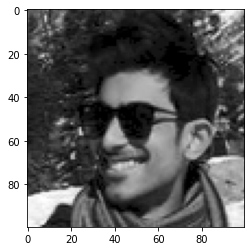


Predicted Percentage :  100.0 %
Predicted Value :  Alina
True Value : Alina
Correctly Classified


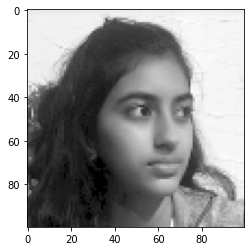


Predicted Percentage :  100.0 %
Predicted Value :  Alina
True Value : Alina
Correctly Classified


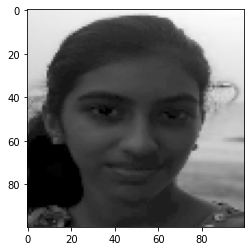


Predicted Percentage :  100.0 %
Predicted Value :  Alina
True Value : Alina
Correctly Classified


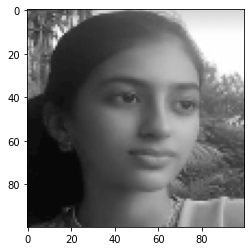

In [ ]:
#g).	The results should also show each of the randomized images with the model prediction percentage (you can use model.predict() method for this)
#i).  For each image, display the image and identify if it was correctly classified or misclassified.

# probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# predictions = model.predict(Trained_Image)
predictions = model.predict(x_test)
# print(predictions)
#Itterate through all the data
for i in range(len(predictions)):
  #Check the prediction percentage in comparission with the actual value of data
  if(y_test[i] == 1):
    print("Predicted Percentage : " , round(predictions[i][0]*10000)/100.0, "%")
  else:
    print("Predicted Percentage : " , round((1-predictions[i][0])*10000)/100.0, "%")
  
  #output the predicted value category[0 or 1], depending on the prediction
  print("Predicted Value : " ,Category[round(predictions[i][0])])
  #output the label for that image
  print("True Value :",  Category[y_test[i]])
  #comparision of label and prediction
  if(round(predictions[i][0]) == y_test[i]):
    print("Correctly Classified")
  else:
    print("Mis-Classified")
  #print the image
  plt.imshow((x_test[i]).reshape(ForceImageSize,ForceImageSize), cmap = "gray")
  plt.show()
  #Leave a line for next set
  print()

Part E making your TensorFlow/Keras Algorithm

**CNN Architecture Algorithm 2**

Part h) Determine The epochs for your model:

***epochs=50*** is enough for the convergence with enough validation accuracy aswell as standard accuracy to binary classify the images

In [ ]:
#Part E making your TensorFlow/Keras Algorithm
#CNN Architecture Algorithm 2
Trained_Image = np.array(x_train/255.0)
Trained_Labels = np.array(y_train)

model = Sequential()

model.add(Conv2D(32,(4,4),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(4,4)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam", 
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(Trained_Image, Trained_Labels,batch_size=32, epochs=50,validation_data=(x_test,y_test),verbose=2)



Epoch 1/50
1/1 - 1s - loss: 0.6931 - accuracy: 0.6562 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 2/50
1/1 - 1s - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6840 - val_accuracy: 0.5000
Epoch 3/50
1/1 - 1s - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 4/50
1/1 - 1s - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.7241 - val_accuracy: 0.5000
Epoch 5/50
1/1 - 1s - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.7863 - val_accuracy: 0.5000
Epoch 6/50
1/1 - 1s - loss: 0.6938 - accuracy: 0.4375 - val_loss: 0.8677 - val_accuracy: 0.5000
Epoch 7/50
1/1 - 1s - loss: 0.6914 - accuracy: 0.5938 - val_loss: 0.9835 - val_accuracy: 0.5000
Epoch 8/50
1/1 - 1s - loss: 0.6919 - accuracy: 0.4688 - val_loss: 1.1586 - val_accuracy: 0.5000
Epoch 9/50
1/1 - 1s - loss: 0.6895 - accuracy: 0.5000 - val_loss: 1.5210 - val_accuracy: 0.5000
Epoch 10/50
1/1 - 1s - loss: 0.6871 - accuracy: 0.6875 - val_loss: 2.0953 - val_accuracy: 0.5000
Epoch 11/50
1/1 - 1s - loss: 0.6889 - a

**Part g).	
The results should also show each of the randomized images with the model prediction percentage (you can use model.predict() method for this).**

**Part i).	
For each image, display the image and identify if it was correctly classified or misclassified.**



Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


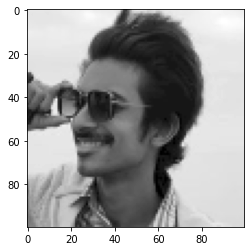


Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


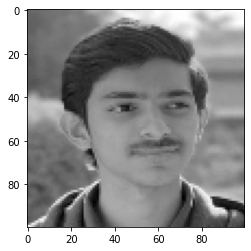


Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


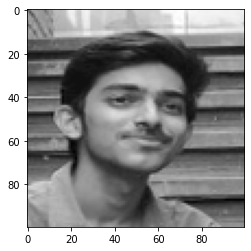


Predicted Percentage :  0.0 %
Predicted Value :  Ashad
True Value : Alina
Mis-Classified


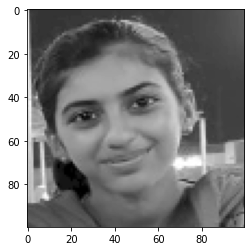


Predicted Percentage :  100.0 %
Predicted Value :  Ashad
True Value : Ashad
Correctly Classified


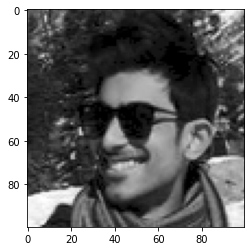


Predicted Percentage :  0.0 %
Predicted Value :  Ashad
True Value : Alina
Mis-Classified


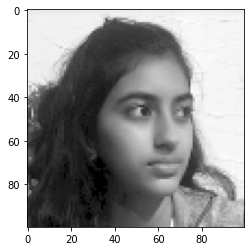


Predicted Percentage :  0.0 %
Predicted Value :  Ashad
True Value : Alina
Mis-Classified


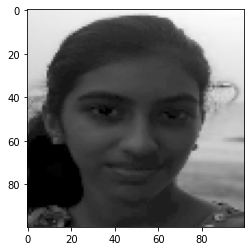


Predicted Percentage :  0.0 %
Predicted Value :  Ashad
True Value : Alina
Mis-Classified


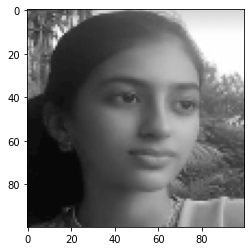

In [ ]:
#g).	The results should also show each of the randomized images with the model prediction percentage (you can use model.predict() method for this)
#i).  For each image, display the image and identify if it was correctly classified or misclassified.

# probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# predictions = model.predict(Trained_Image)
predictions = model.predict(x_test)
# print(predictions)
#Itterate through all the data
for i in range(len(predictions)):
  #Check the prediction percentage in comparission with the actual value of data
  if(y_test[i] == 1):
    print("Predicted Percentage : " , round(predictions[i][0]*10000)/100.0, "%")
  else:
    print("Predicted Percentage : " , round((1-predictions[i][0])*10000)/100.0, "%")
  
  #output the predicted value category[0 or 1], depending on the prediction
  print("Predicted Value : " ,Category[round(predictions[i][0])])
  #output the label for that image
  print("True Value :",  Category[y_test[i]])
  #comparision of label and prediction
  if(round(predictions[i][0]) == y_test[i]):
    print("Correctly Classified")
  else:
    print("Mis-Classified")
  #print the image
  plt.imshow((x_test[i]).reshape(ForceImageSize,ForceImageSize), cmap = "gray")
  plt.show()
  #Leave a line for next set
  print()

**j.	
Can you comment on why they could have been misclassified?**

The Training data size is small therefore the model is not trained generally and will be trained on specic features(of the face) in the training data only

Images could be Mis-Classified with the 
prediction percentage not favoring the True Value due to the facial features being hidden, for eg: half of the face is being covered with hands or mask therefore the CNN would have misinterpreted the facial features with hands.

Another Possible reason for Misclassification can be blurred image, side posed, or in other words facial features not being clearly identified.

Images from the past of kids when the facial features have yet not developed or are not visible to distinguish between individuals

Distant Image is also another reason. Or dark image, with visibility issues.

Rotated Images can be misclasified too sometimes, another reason could be same facial features but 2 different faces/pictures for eg: Picasso image of someone and real image, both would have same facial Features as identified by the CNN
